In [13]:
import config
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Do some matplotlib configuration
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
path_date_temp = config.PATH_DATA_TEMP

We need a couple of data sets:
1. BTC price in dollars. Yahoo Finance [goes back to 17 July 2010](https://finance.yahoo.com/quote/BTC-EUR/history/).
2. A reliable [USD-EUR exchange rate](https://sdw.ecb.europa.eu/quickview.do;jsessionid=8DD8646E685206C2575B5C0E50773A7D?SERIES_KEY=120.EXR.D.USD.EUR.SP00.A&start=17-07-2010&end=30-09-2019&submitOptions.x=0&submitOptions.y=0&trans=N) on those dates since 17 July 2010. There are no exchange rate data for weekends.
3. Market Capitalization data, through [CoinMarketCap](https://coinmarketcap.com/currencies/bitcoin/historical-data/), data available from 2013.

In [3]:
#Import BTC-USD historical exchange rate

btc_usd = pd.read_csv(path_data_temp + 'btc_price_dollar_yahoo.csv', parse_dates=True)
btc_usd.head()

,date,open,high,low,close,adjusted_close,volume
0,2010-07-17,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-18,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-19,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-20,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-21,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [4]:
#Import USD-EUR historical exchange rate

usd_eur = pd.read_csv(path_data_temp + 'usd_eur_ecb.csv', parse_dates=True, usecols=['date', 's1'])
usd_eur.head()

,date,s1
0,2010-07-19,1.2957
1,2010-07-20,1.2844
2,2010-07-21,1.2817
3,2010-07-22,1.2850
4,2010-07-23,1.2897


In [5]:
#Merge dataframes on dates

btc_eur = pd.merge(btc_usd, usd_eur, on='date', how='outer')
btc_eur.head()

,date,open,high,low,close,adjusted_close,volume,s1
0,2010-07-17,0.04951,0.04951,0.04951,0.04951,0.04951,0,NaN
1,2010-07-18,0.04951,0.08585,0.05941,0.08584,0.08584,5,NaN
2,2010-07-19,0.08584,0.09307,0.07723,0.08080,0.08080,49,1.2957
3,2010-07-20,0.08080,0.08181,0.07426,0.07474,0.07474,20,1.2844
4,2010-07-21,0.07474,0.07921,0.06634,0.07921,0.07921,42,1.2817


In [6]:
#Rename columns, convert dates to datetime and fill NaNs

btc_eur = btc_eur.rename(columns={'s1':'exchange_rate'})
btc_eur.date = pd.to_datetime(btc_eur.date)
btc_eur['exchange_rate'] = btc_eur['exchange_rate'].fillna(method='ffill')

In [7]:
#Calculate historical BTC price in EUR.

btc_eur['close_euro'] = btc_eur['close'] / btc_eur['exchange_rate']
btc_eur = btc_eur.dropna()
btc_eur.tail()

,date,open,high,low,close,adjusted_close,volume,exchange_rate,close_euro
3357,2019-09-25,8542.540039,8752.200195,8246.240234,8446.969727,8446.969727,631898763,1.0982,7691.649724
3358,2019-09-26,8446.969727,8471.019531,7753.709961,8074.990234,8074.990234,652614929,1.0938,7382.510728
3359,2019-09-27,8074.990234,8304.219727,7888.500000,8201.360352,8201.360352,390323710,1.0935,7500.100916
3360,2019-09-28,8201.360352,8345.030273,8044.450195,8223.650391,8223.650391,244186983,1.0935,7520.485040
3361,2019-09-29,8223.650391,8265.990234,7943.330078,8065.259766,8065.259766,226594823,1.0935,7375.637646


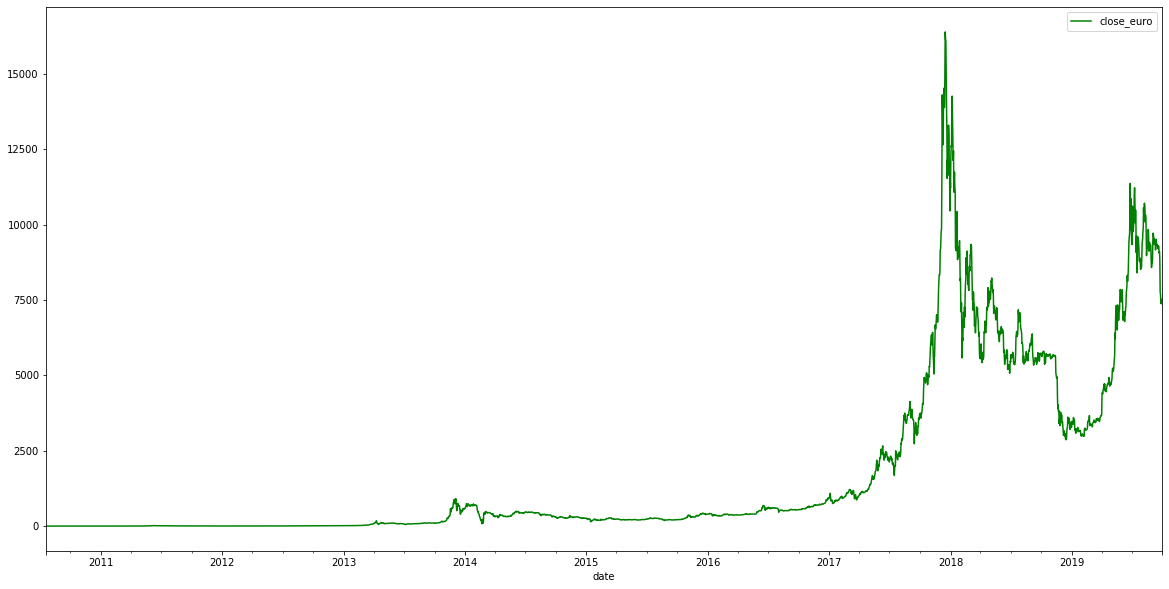

In [14]:
btc_eur.plot(kind='line', x='date', y='close_euro', color='green')
plt.show()

In [71]:
#Look at market capitalization (mc)

mc = pd.read_csv(path_data_temp + 'btc_price_coinmarketcap.csv', parse_dates=True)
mc.date = pd.to_datetime(mc.date)
mc.head()

,date,high,low,volume,market_cap
0,2019-09-29,"8261,71","7990,50",13034629109,145590374681
1,2019-09-28,"8285,62","8125,43",14141152736,148122503616
2,2019-09-27,"8271,52","7965,92",16408941156,148212635834
3,2019-09-26,"8515,69","7895,63",19258205289,145812492488
4,2019-09-25,"8744,83","8325,40",21744728353,152404005091


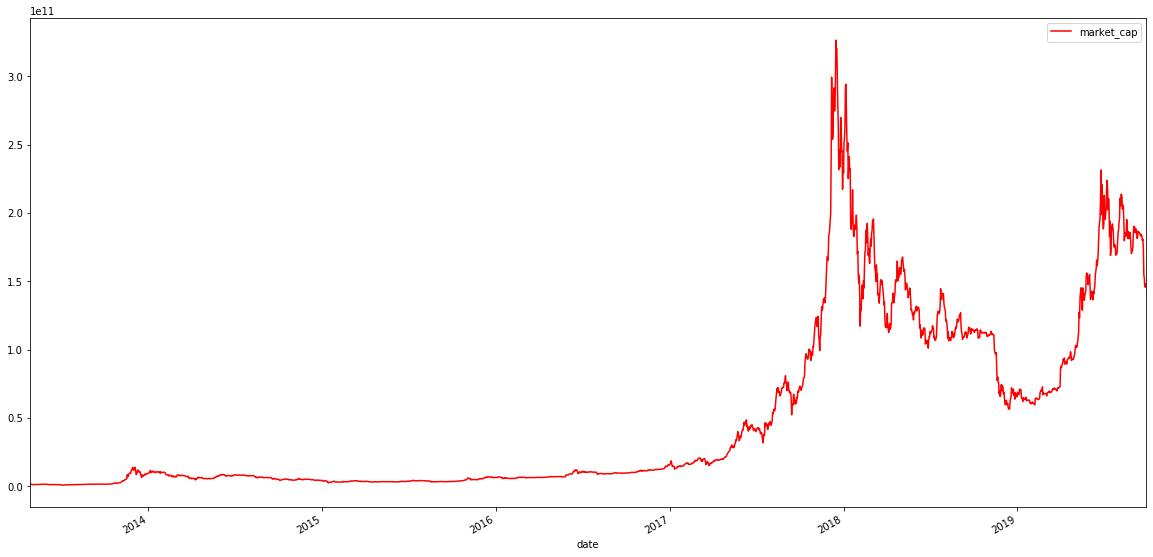

In [66]:
mc.plot(kind='line', x='date', y='market_cap', color='red')
plt.show()

In [17]:
#Select values between two dates for further inspection

def plot_daterange(start_date, end_date):
    
    '''takes a start_date and end_date
    and plots a line chart'''
    
    mask = (btc_eur['date'] > start_date) & (btc_eur['date'] <= end_date)
    date_range = btc_eur.loc[mask]
    date_range.plot(kind='line', x='date', y='close_euro', color='blue')
    plt.grid(b=True, which='major', color='#666666', linestyle='-')

    return plt.show()

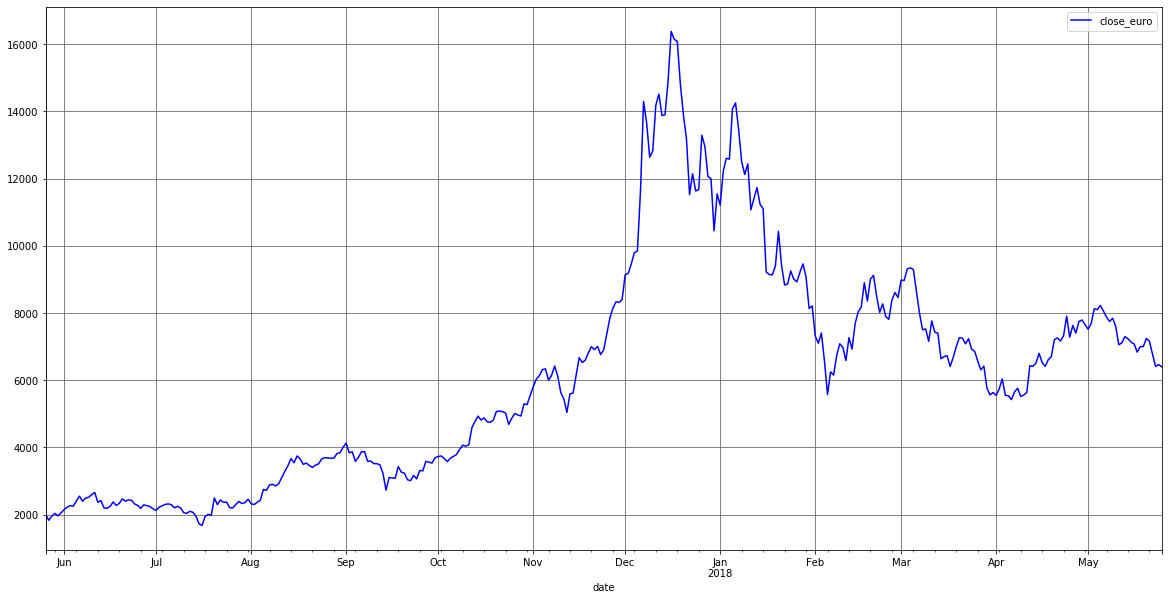

In [21]:
start_date = '2017-05-25'
end_date = '2018-05-25'

plot_daterange(start_date, end_date)

In [55]:
#Compare with Google trends

google_trends = pd.read_csv(path_data_temp + 'google_trends_btc.csv')
google_trends.month = pd.to_datetime(google_trends.month)
google_trends['bitcoin: (Worldwide)'].replace('<1', 0, inplace=True)
google_trends['bitcoin: (Worldwide)'] = google_trends['bitcoin: (Worldwide)'].astype('float')

In [59]:
def plot_google_daterange(start_date, end_date):
    
    '''takes a start_date and end_date
    and plots a line chart'''
    
    mask = (google_trends['month'] > start_date) & (google_trends['month'] <= end_date)
    date_range = google_trends.loc[mask]
    date_range.plot(kind='line', x='month', y='bitcoin: (Worldwide)', color='blue')
    plt.grid(b=True, which='major', color='#666666', linestyle='-')

    return plt.show()

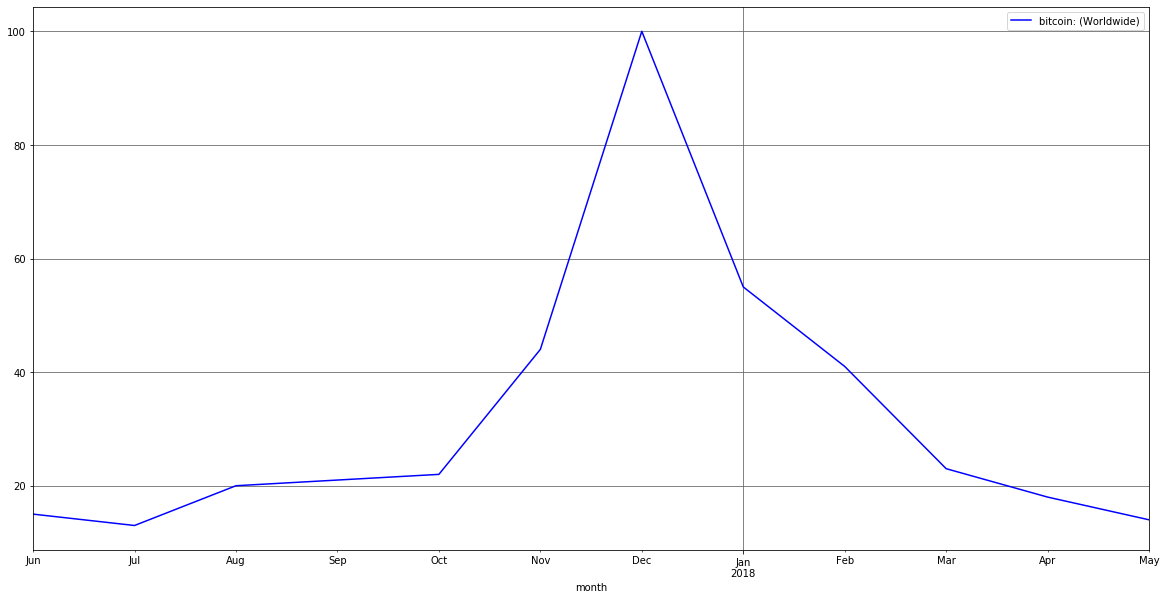

In [63]:
start_date = '2017-05-01'
end_date = '2018-05-01'

plot_google_daterange(start_date, end_date)